<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/LSTM%EB%82%B4%EB%B6%80%EC%A0%80%ED%95%AD%EA%B5%AC%ED%95%98%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [407]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, SimpleRNN, Dropout
from keras import optimizers
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [408]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [409]:
df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0222_20110307012737_cell_7.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,7,0.296,2.25,-20
1,2011.3.7 18:29,7,0.297,2.25,-20
2,2011.3.8 6:29,7,0.298,2.25,-20
3,2011.3.8 18:29,7,0.298,2.25,-20
4,2011.3.9 6:29,7,0.296,2.25,-20
...,...,...,...,...,...
250,2011.8.30 5:28,7,0.619,2.29,-20
251,2011.8.30 17:28,7,0.620,2.30,-20
252,2011.8.31 5:28,7,0.623,2.30,-20
253,2011.8.31 16:09,7,0.639,2.30,-20


In [410]:
train = df.drop(['CellNo', 'MeasuredDate'], axis=1)

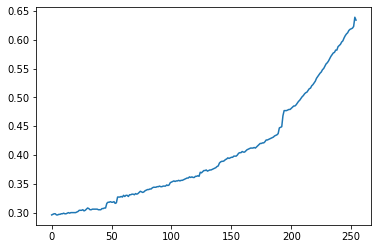

In [411]:
df['Resistance'].plot()

In [412]:
train

,Resistance,Volt,Temp
0,0.296,2.25,-20
1,0.297,2.25,-20
2,0.298,2.25,-20
3,0.298,2.25,-20
4,0.296,2.25,-20
...,...,...,...
250,0.619,2.29,-20
251,0.620,2.30,-20
252,0.623,2.30,-20
253,0.639,2.30,-20


In [413]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scale_cols = ['Volt', 'Temp', 'Resistance']
# df_scaled = scaler.fit_transform(df[scale_cols])

# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols

# print(df_scaled)
# scaler = StandardScaler()
# scale_cols = ['Volt', 'Temp', 'Resistance']
# df_scaled = scaler.fit_transform(df[scale_cols])

# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols

# print(df_scaled)

train


In [414]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')
test_df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,22,0.253,2.23,-20
1,2011.3.7 18:29,22,0.252,2.23,-20
2,2011.3.8 6:29,22,0.253,2.23,-20
3,2011.3.8 18:29,22,0.253,2.23,-20
4,2011.3.9 6:29,22,0.252,2.23,-20
...,...,...,...,...,...
246,2011.8.29 17:28,22,0.275,2.22,-20
247,2011.8.30 5:28,22,0.277,2.22,-20
248,2011.8.30 17:28,22,0.276,2.22,-20
249,2011.8.31 5:28,22,0.276,2.22,-20


In [415]:
test = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

In [416]:
test2 = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

In [417]:
test2 = test2['Resistance']
test2

0      0.253
1      0.252
2      0.253
3      0.253
4      0.252
       ...  
246    0.275
247    0.277
248    0.276
249    0.276
250    0.275
Name: Resistance, Length: 251, dtype: float64

In [418]:
all_window = len(test2)
all_window

251

In [419]:
seq = len(test)
seq = seq*0.7


test = test.iloc[0:round(seq),:]
test

,Resistance,Volt,Temp
0,0.253,2.23,-20
1,0.252,2.23,-20
2,0.253,2.23,-20
3,0.253,2.23,-20
4,0.252,2.23,-20
...,...,...,...
171,0.264,2.23,-20
172,0.263,2.23,-20
173,0.265,2.23,-20
174,0.265,2.23,-20


In [420]:
# scale_cols = ['Volt', 'Temp', 'Resistance']
# test_df_scaled = scaler.fit_transform(test_df[scale_cols])

# test_df_scaled = pd.DataFrame(test_df_scaled)
# test_df_scaled.columns = scale_cols

# print(test_df_scaled)

In [421]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [422]:
from sklearn.model_selection import train_test_split

feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Volt', 'Temp', 'Resistance']

train_feature = train[feature_cols]
train_label = train[label_cols]

test_feature = test[feature_cols]
test_label = test[label_cols]



In [423]:
test_label

,Volt,Temp,Resistance
0,2.23,-20,0.253
1,2.23,-20,0.252
2,2.23,-20,0.253
3,2.23,-20,0.253
4,2.23,-20,0.252
...,...,...,...
171,2.23,-20,0.264
172,2.23,-20,0.263
173,2.23,-20,0.265
174,2.23,-20,0.265


In [424]:
train_label

,Volt,Temp,Resistance
0,2.25,-20,0.296
1,2.25,-20,0.297
2,2.25,-20,0.298
3,2.25,-20,0.298
4,2.25,-20,0.296
...,...,...,...
250,2.29,-20,0.619
251,2.30,-20,0.620
252,2.30,-20,0.623
253,2.30,-20,0.639


In [425]:
scale_cols = ['Volt', 'Temp', 'Resistance']
scale_cols2 = ['Volt', 'Temp', 'Resistance']

train_feature = scaler.fit_transform(train_feature)
train_feature = pd.DataFrame(train_feature)
train_feature.columns = scale_cols

train_label = scaler.fit_transform(train_label)
train_label = pd.DataFrame(train_label)
train_label.columns = scale_cols2

test_feature = scaler.fit_transform(test_feature)
test_feature = pd.DataFrame(test_feature)
test_feature.columns = scale_cols

test_label = scaler.fit_transform(test_label)
test_label = pd.DataFrame(test_label)
test_label.columns = scale_cols2


In [426]:
train_feature

,Volt,Temp,Resistance
0,0.0,0.0,0.000000
1,0.0,0.0,0.002915
2,0.0,0.0,0.005831
3,0.0,0.0,0.005831
4,0.0,0.0,0.000000
...,...,...,...
250,0.8,0.0,0.941691
251,1.0,0.0,0.944606
252,1.0,0.0,0.953353
253,1.0,0.0,1.000000


In [427]:
train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

test_feature, test_label = make_dataset(test_feature, test_label, 20)

In [428]:
train_feature

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00291545],
        [0.        , 0.        , 0.0058309 ],
        ...,
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181]],

       [[0.        , 0.        , 0.00291545],
        [0.        , 0.        , 0.0058309 ],
        [0.        , 0.        , 0.0058309 ],
        ...,
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181]],

       [[0.        , 0.        , 0.0058309 ],
        [0.        , 0.        , 0.0058309 ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01457726]],

       ...,

       [[0.6       , 0.        , 0.79008746],
        [0.6       , 0.        , 0.80174927],
        [0.6       , 0

LSTM 모델


In [429]:


model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(3))

In [430]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 16)                1280      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 51        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [431]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/Users/wlsrm/data', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
12/12 [==============================] - 2s 52ms/step - loss: 0.1324 - val_loss: 0.0871

Epoch 00001: val_loss improved from inf to 0.08706, saving model to C:/Users/wlsrm/data/tmp_checkpoint.h5
Epoch 2/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0993 - val_loss: 0.0611

Epoch 00002: val_loss improved from 0.08706 to 0.06114, saving model to C:/Users/wlsrm/data/tmp_checkpoint.h5
Epoch 3/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0625 - val_loss: 0.0460

Epoch 00003: val_loss improved from 0.06114 to 0.04604, saving model to C:/Users/wlsrm/data/tmp_checkpoint.h5
Epoch 4/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0506 - val_loss: 0.0369

Epoch 00004: val_loss improved from 0.04604 to 0.03686, saving model to C:/Users/wlsrm/data/tmp_checkpoint.h5
Epoch 5/200
12/12 [==============================] - 0s 30ms/step - loss: 0.0438 - val_loss: 0.0283

Epoch 00005: val_loss improved from 0.03686 to 0.02830, sav

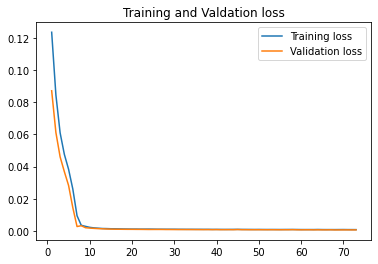

In [432]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()  

In [433]:
look_ahead=all_window
xhat = test_feature[0]
predictions = np.zeros((look_ahead, 3))
for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=16)
  predictions[i] = prediction
  xhat=np.vstack([xhat[1:],prediction])
  # print(i,"번째", "prediction",prediction, "xhat", xhat, "predictions[i] = ", predictions[i])

In [434]:
pred_inverse = scaler.inverse_transform(predictions)

In [435]:
pred2 = pred_inverse[:,2]

In [436]:
pred2 = pred2.reshape(-1,1)

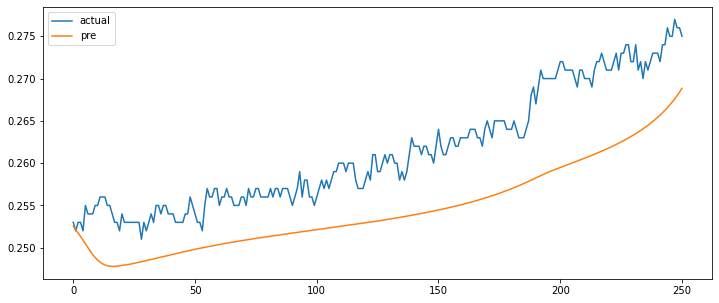

In [437]:
plt.figure(figsize=(12,5))
plt.plot(test2,label="actual")
plt.plot(pred2,label="pre")
plt.legend()
plt.show()